In [1]:
import kwant.continuum
import kwant
import numpy as np
import matplotlib.pyplot as plt
import tinyarray
import scipy

C:\Users\caidi\Anaconda3\lib\site-packages\kwant\solvers\default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


# Try 2D finite model

In [2]:
a = 1 #lattice constant
hami = 'M(x,y)*sigma_z + k_x*sigma_x + k_y*sigma_y + (2-k_x**2/2-k_y**2/2)*sigma_z'#add kx**2 term for numerical stability
template = kwant.continuum.discretize(hami, grid = a)
print(template)

# Discrete coordinates: x y

# Onsite element:
_cache_0 = (
array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]]))
_cache_1 = (
array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]]))
def onsite(site, M):
    (x, y, ) = site.pos
    _const_0 = (M(x, y))
    return (_const_0) * (_cache_0) + (1) * (_cache_1)

# Hopping from (1, 0):
array([[(0.5+0j), -0.5j],
       [-0.5j, (-0.5+0j)]])

# Hopping from (0, 1):
array([[(0.5+0j), (-0.5+0j)],
       [(0.5+0j), (-0.5+0j)]])


In [3]:
W = 40
L = 40
def square_shape(site):
    (x,y) = site.pos
    return (0<=y<W and 0<=x<L)
def potential(x,y):
    return [0.5,-0.5][y < W/2]
    #return -1
syst = kwant.Builder()
syst.fill(template, square_shape,(0,0))
syst = syst.finalized()

In [4]:
ham = syst.hamiltonian_submatrix(params=dict(M=potential),sparse = False)

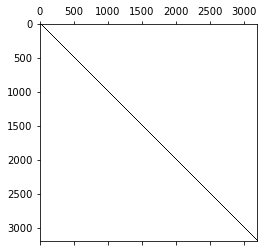

In [5]:
plt.spy(ham) #block off-diagonal

In [6]:
ev,evecs = scipy.linalg.eigh(ham)
#ev,evecs = scipy.sparse.linalg.eigsh(ham, k =801)

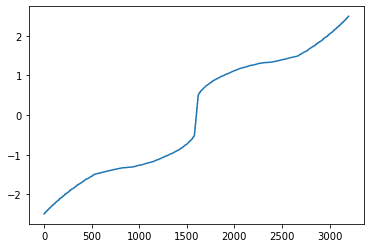

In [7]:
plt.plot(ev) # plot eigvalues

In [8]:
wavefunction = evecs[:, 1600-1]

In [9]:
up,down = wavefunction[::2],wavefunction[1::2]
density = np.abs(up)**2 + np.abs(down)**2

C:\Users\caidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: The plotted data contains 0.38% of values overflowing upper limit 0.00633325 
  """Entry point for launching an IPython kernel.


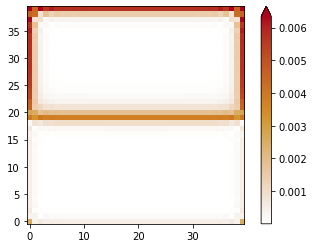

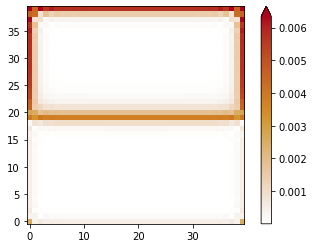

In [10]:
kwant.plotter.map(syst, density, show=False)

# Try 1D, cylinder geometry (finite size)

In [11]:
a = 1 #lattice constant
hami = 'M(x,y)*sigma_z + k_x*sigma_x + momentum*sigma_y + (2-k_x**2/2-momentum**2/2)*sigma_z'#add kx**2 term for numerical stability
template = kwant.continuum.discretize(hami, grid = a)

In [12]:
template

In [13]:
L = 100
def wire_shape(site):
    (x, ) = site.pos
    return (0<=x<L)
def potential(x,y=0):
    return [0.5,-0.5][x < L/2]
    #return -1
syst = kwant.Builder()
syst.fill(template, wire_shape,(0,))
syst = syst.finalized()

In [14]:
ham = syst.hamiltonian_submatrix(params=dict(M=potential,momentum = 0.1,y=0),sparse = False)

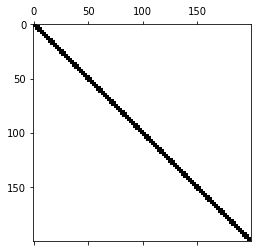

In [15]:
plt.spy(ham) #block off-diagonal

In [16]:
ev,evecs = scipy.linalg.eigh(ham)
#ev,evecs = scipy.sparse.linalg.eigsh(ham, k =801)

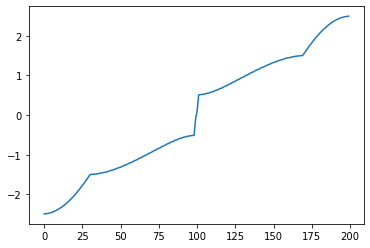

In [17]:
plt.plot(ev) # plot eigvalues

In [18]:
wavefunction = evecs[:, 100-1]

In [19]:
up,down = wavefunction[::2],wavefunction[1::2]
density = np.abs(up)**2 + np.abs(down)**2

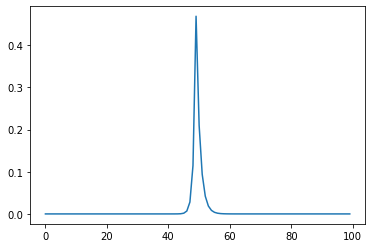

In [20]:
plt.plot(density)